In [142]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoMinorLocator

import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [143]:
orange = ["#ffac00"]
darkorange = ["#662089"]
blue = ["#1B4882"]
green = ["#086361"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

#### Half filling

In [144]:
charge_file = h5py.File("../data/processed_data/GS_ChargeCorr_Lx8_Ly8_N64_beta18.0.jld", "r")
pair_file = h5py.File("../data/processed_data/GS_PairCorr_Lx8_Ly8_N64_beta18.0.jld", "r")
pairsps_file = h5py.File("../data/processed_data/GS_PairSpsCorr_Lx8_Ly8_N64_beta18.0.jld", "r")

U = np.array([i for i in range(-1, -9, -1)])

cr_avg = charge_file['ninj_avg'][:]
cr_err = charge_file['ninj_err'][:]
crsf_avg = charge_file['struct_fact_avg'][:]
crsf_err = charge_file['struct_fact_err'][:]

gr_avg = pair_file['Ps_avg'][:]
gr_err = pair_file['Ps_err'][:]
grsf_avg = pair_file['struct_fact_avg'][:]
grsf_err = pair_file['struct_fact_err'][:]

grsps_avg = pairsps_file['ninj_updn_avg'][:]
grsps_err = pairsps_file['ninj_updn_err'][:]
grspssf_avg = pairsps_file['struct_fact_avg'][:]
grspssf_err = pairsps_file['struct_fact_err'][:]


In [145]:
dr  = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
idx = [0, 5, 10, 15, 20, 21, 22, 23, 24]

(0.0, 0.3)

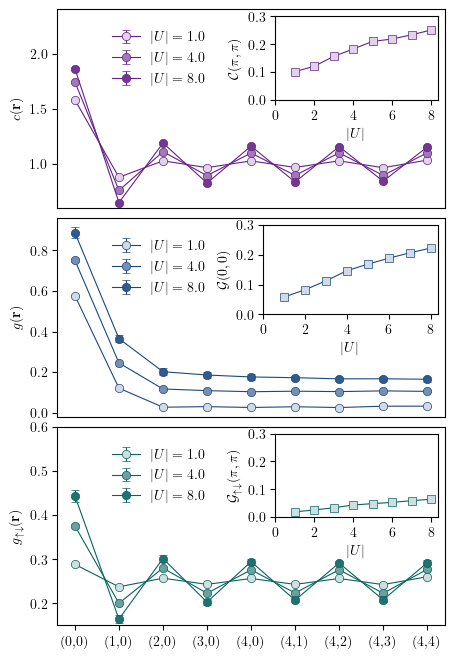

In [146]:
fig = plt.figure(figsize=(5, 8))
gs = gridspec.GridSpec(3, 1, hspace=0.05)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['(0,0)', '(1,0)', '(2,0)', '(3,0)', '(4,0)', '(4,1)', '(4,2)', '(4,3)', '(4,4)'])

ax1.set_ylabel(r'$c(\mathbf{r})$')
ax2.set_ylabel(r'$g(\mathbf{r})$')
ax3.set_ylabel(r'$g_{\uparrow\downarrow}(\mathbf{r})$')

ax1.errorbar(
    range(9), cr_avg[0, idx], yerr=cr_err[0, idx], 
    label=r'$|U|=1.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[5], markeredgewidth=0.5
)
ax1.errorbar(
    range(9), cr_avg[3, idx], yerr=cr_err[3, idx], 
    label=r'$|U|=4.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[3], markeredgewidth=0.5
)
ax1.errorbar(
    range(9), cr_avg[7, idx], yerr=cr_err[7, idx], 
    label=r'$|U|=8.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[1], markeredgewidth=0.5
)
ax1.legend(frameon=False, ncol=1, bbox_to_anchor=(0.11, 0.55))


ax2.errorbar(
    range(9), gr_avg[0, idx], yerr=gr_err[0, idx], 
    label=r'$|U|=1.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[5], markeredgewidth=0.5
)
ax2.errorbar(
    range(9), gr_avg[3, idx], yerr=gr_err[3, idx], 
    label=r'$|U|=4.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[3], markeredgewidth=0.5
)
ax2.errorbar(
    range(9), gr_avg[7, idx], yerr=gr_err[7, idx], 
    label=r'$|U|=8.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[1], markeredgewidth=0.5
)
ax2.legend(frameon=False, ncol=1, bbox_to_anchor=(0.11, 0.55))

ax3.errorbar(
    range(9), grsps_avg[0, idx], yerr=grsps_err[0, idx], 
    label=r'$|U|=1.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[5], markeredgewidth=0.5
)
ax3.errorbar(
    range(9), grsps_avg[3, idx], yerr=grsps_err[3, idx], 
    label=r'$|U|=4.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[3], markeredgewidth=0.5
)
ax3.errorbar(
    range(9), grsps_avg[7, idx], yerr=grsps_err[7, idx], 
    label=r'$|U|=8.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[1], markeredgewidth=0.5
)
ax3.legend(frameon=False, ncol=1, bbox_to_anchor=(0.11, 0.55))

ax1.set_ylim([0.6,2.4])
ax1ins = inset_axes(ax1, width='42%', height='42%', loc='upper right')
ax1ins.errorbar(
    abs(U), crsf_avg, yerr=crsf_err, 
    linewidth=0.8, elinewidth=0.8,
    fmt='-s', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[5], markeredgewidth=0.5
)
ax1ins.set_xlabel(r'$|U|$')
ax1ins.set_xticks([0,2,4,6,8])
ax1ins.set_ylabel(r'$\mathcal{C}(\pi, \pi)$')
ax1ins.set_ylim([0.0,0.3])

ax2ins = inset_axes(ax2, width='45%', height='45%', loc='upper right')
ax2ins.errorbar(
    abs(U), grsf_avg, yerr=grsf_err, 
    linewidth=0.8, elinewidth=0.8,
    fmt='-s', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[5], markeredgewidth=0.5
)
ax2ins.set_xlabel(r'$|U|$')
ax2ins.set_xticks([0,2,4,6,8])
ax2ins.set_ylabel(r'$\mathcal{G}(0, 0)$')
ax2ins.set_ylim([0.0,0.3])

ax3.set_ylim([0.15,0.6])
ax3ins = inset_axes(ax3, width='42%', height='42%', loc='upper right')
ax3ins.errorbar(
    abs(U), grspssf_avg, yerr=grspssf_err, 
    linewidth=0.8, elinewidth=0.8,
    fmt='-s', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[5], markeredgewidth=0.5
)
ax3ins.set_xlabel(r'$|U|$')
ax3ins.set_xticks([0,2,4,6,8])
ax3ins.set_ylabel(r'$\mathcal{G}_{\uparrow\downarrow}(\pi, \pi)$')
ax3ins.set_ylim([0.0,0.3])


In [147]:
fig.savefig("../figures/GS_CorrFuncs_Lx8Ly8_N64.pdf")
fig.savefig("../figures/GS_CorrFuncs_Lx8Ly8_N64.svg")

#### Quarter Filling

In [148]:
charge_file = h5py.File("../data/processed_data/GS_ChargeCorr_Lx8_Ly8_N32_beta18.0.jld", "r")
pair_file = h5py.File("../data/processed_data/GS_PairCorr_Lx8_Ly8_N32_beta18.0.jld", "r")
pairsps_file = h5py.File("../data/processed_data/GS_PairSpsCorr_Lx8_Ly8_N32_beta18.0.jld", "r")

U = np.array([i for i in range(-1, -9, -1)])

cr_avg = charge_file['ninj_avg'][:]
cr_err = charge_file['ninj_err'][:]
crsf_avg = charge_file['struct_fact_avg'][:]
crsf_err = charge_file['struct_fact_err'][:]

gr_avg = pair_file['Ps_avg'][:]
gr_err = pair_file['Ps_err'][:]
grsf_avg = pair_file['struct_fact_avg'][:]
grsf_err = pair_file['struct_fact_err'][:]

grsps_avg = pairsps_file['ninj_updn_avg'][:]
grsps_err = pairsps_file['ninj_updn_err'][:]
grspssf_avg = pairsps_file['struct_fact_avg'][:]
grspssf_err = pairsps_file['struct_fact_err'][:]

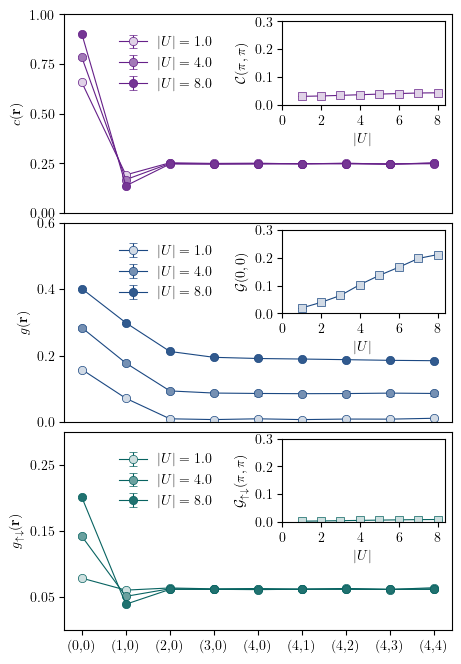

In [149]:
fig = plt.figure(figsize=(5, 8))
gs = gridspec.GridSpec(3, 1, hspace=0.05)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['(0,0)', '(1,0)', '(2,0)', '(3,0)', '(4,0)', '(4,1)', '(4,2)', '(4,3)', '(4,4)'])

ax1.set_ylabel(r'$c(\mathbf{r})$')
ax2.set_ylabel(r'$g(\mathbf{r})$')
ax3.set_ylabel(r'$g_{\uparrow\downarrow}(\mathbf{r})$')

ax1.errorbar(
    range(9), cr_avg[0, idx], yerr=cr_err[0, idx], 
    label=r'$|U|=1.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[5], markeredgewidth=0.5
)
ax1.errorbar(
    range(9), cr_avg[3, idx], yerr=cr_err[3, idx], 
    label=r'$|U|=4.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[3], markeredgewidth=0.5
)
ax1.errorbar(
    range(9), cr_avg[7, idx], yerr=cr_err[7, idx], 
    label=r'$|U|=8.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[1], markeredgewidth=0.5
)
ax1.legend(frameon=False, ncol=1, bbox_to_anchor=(0.11, 0.55))


ax2.errorbar(
    range(9), gr_avg[0, idx], yerr=gr_err[0, idx], 
    label=r'$|U|=1.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[5], markeredgewidth=0.5
)
ax2.errorbar(
    range(9), gr_avg[3, idx], yerr=gr_err[3, idx], 
    label=r'$|U|=4.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[3], markeredgewidth=0.5
)
ax2.errorbar(
    range(9), gr_avg[7, idx], yerr=gr_err[7, idx], 
    label=r'$|U|=8.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[1], markeredgewidth=0.5
)
ax2.legend(frameon=False, ncol=1, bbox_to_anchor=(0.11, 0.55))

ax3.errorbar(
    range(9), grsps_avg[0, idx], yerr=grsps_err[0, idx], 
    label=r'$|U|=1.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[5], markeredgewidth=0.5
)
ax3.errorbar(
    range(9), grsps_avg[3, idx], yerr=grsps_err[3, idx], 
    label=r'$|U|=4.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[3], markeredgewidth=0.5
)
ax3.errorbar(
    range(9), grsps_avg[7, idx], yerr=grsps_err[7, idx], 
    label=r'$|U|=8.0$',
    linewidth=0.8, elinewidth=0.8,
    fmt='-o', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[1], markeredgewidth=0.5
)
ax3.legend(frameon=False, ncol=1, bbox_to_anchor=(0.11, 0.55))

ax1.set_ylim([0.0,1.0])
ax1ins = inset_axes(ax1, width='42%', height='42%', loc='upper right')
ax1ins.errorbar(
    abs(U), crsf_avg, yerr=crsf_err, 
    linewidth=0.8, elinewidth=0.8,
    fmt='-s', markersize=6, capsize=3, capthick=1,
    color=darkorange[0],
    markerfacecolor=darkorange[5], markeredgewidth=0.5
)
ax1ins.set_xlabel(r'$|U|$')
ax1ins.set_xticks([0,2,4,6,8])
ax1ins.set_ylabel(r'$\mathcal{C}(\pi, \pi)$')
ax1ins.set_ylim([0.0,0.3])

ax2.set_ylim([0.0,0.6])
ax2ins = inset_axes(ax2, width='42%', height='42%', loc='upper right')
ax2ins.errorbar(
    abs(U), grsf_avg, yerr=grsf_err, 
    linewidth=0.8, elinewidth=0.8,
    fmt='-s', markersize=6, capsize=3, capthick=1,
    color=blue[0],
    markerfacecolor=blue[5], markeredgewidth=0.5
)
ax2ins.set_xlabel(r'$|U|$')
ax2ins.set_xticks([0,2,4,6,8])
ax2ins.set_ylabel(r'$\mathcal{G}(0, 0)$')
ax2ins.set_ylim([0.0,0.3])

ax3.set_ylim([0.0,0.3])
ax3ins = inset_axes(ax3, width='42%', height='42%', loc='upper right')
ax3ins.errorbar(
    abs(U), grspssf_avg, yerr=grspssf_err, 
    linewidth=0.8, elinewidth=0.8,
    fmt='-s', markersize=6, capsize=3, capthick=1,
    color=green[0],
    markerfacecolor=green[5], markeredgewidth=0.5
)
ax3ins.set_xlabel(r'$|U|$')
ax3ins.set_xticks([0,2,4,6,8])
ax3ins.set_ylabel(r'$\mathcal{G}_{\uparrow\downarrow}(\pi, \pi)$')
ax3ins.set_ylim([0.0,0.3])

ax1.set_yticks([0.0, 0.25, 0.50, 0.75, 1.0])
ax2.set_yticks([0.0, 0.20, 0.40, 0.60])
ax3.set_yticks([0.05, 0.15, 0.25])

In [150]:
fig.savefig("../figures/GS_CorrFuncs_Lx8Ly8_N32.pdf")
fig.savefig("../figures/GS_CorrFuncs_Lx8Ly8_N32.svg")